In [2]:
from ctmds.random_prices import rand_uniform_prices


len(rand_uniform_prices(5))

5

In [3]:
from ctmds.country_datetime_series import get_country_datetime_series

In [4]:
# ts = get_country_datetime_series("2024-03-31", "GB", "half-hourly")
ts = get_country_datetime_series("2024-10-27", "GB", "half-hourly")
print(len(ts))
ts

50


DatetimeIndex(['2024-10-27 00:00:00+01:00', '2024-10-27 00:30:00+01:00',
               '2024-10-27 01:00:00+01:00', '2024-10-27 01:30:00+01:00',
               '2024-10-27 01:00:00+00:00', '2024-10-27 01:30:00+00:00',
               '2024-10-27 02:00:00+00:00', '2024-10-27 02:30:00+00:00',
               '2024-10-27 03:00:00+00:00', '2024-10-27 03:30:00+00:00',
               '2024-10-27 04:00:00+00:00', '2024-10-27 04:30:00+00:00',
               '2024-10-27 05:00:00+00:00', '2024-10-27 05:30:00+00:00',
               '2024-10-27 06:00:00+00:00', '2024-10-27 06:30:00+00:00',
               '2024-10-27 07:00:00+00:00', '2024-10-27 07:30:00+00:00',
               '2024-10-27 08:00:00+00:00', '2024-10-27 08:30:00+00:00',
               '2024-10-27 09:00:00+00:00', '2024-10-27 09:30:00+00:00',
               '2024-10-27 10:00:00+00:00', '2024-10-27 10:30:00+00:00',
               '2024-10-27 11:00:00+00:00', '2024-10-27 11:30:00+00:00',
               '2024-10-27 12:00:00+00:00', '2024-1

In [ ]:
import numpy as np
import pandas as pd


def get_commodity_price_series(for_date, country_code, granularity: str = "hourly", seed=None):
    """
    Generate synthetic price series for power, natural gas, and crude oil.

    Parameters
    ----------
    - for_date: str, date in 'YYYY-MM-DD' format
    - country_code: str, one of ['GB', 'FR', 'NL', 'DE']
    - freq: str, frequency of data points, one of ['hourly', 'half-hourly']

    Returns
    -------
    - DataFrame with datetime index and price columns for power, natural gas, and crude oil
    """
    # Create a datetime index
    dates = get_country_datetime_series(for_date, country_code, granularity)
    n = len(dates)
    hours = dates.hour
    days = dates.dayofyear

    # Country-specific base prices (in €/MWh for power & gas, $/barrel for crude)
    base_prices = {
        "GB": {"power": 55, "natgas": 25, "crude": 72},
        "FR": {"power": 50, "natgas": 20, "crude": 70},
        "NL": {"power": 48, "natgas": 18, "crude": 69},
        "DE": {"power": 45, "natgas": 22, "crude": 68},
    }

    # Get country-specific base prices
    base_power_price = base_prices[country_code]["power"]
    base_natgas_price = base_prices[country_code]["natgas"]
    base_crude_price = base_prices[country_code]["crude"]

    # Seasonal effect using sine wave
    # Annual seasonality (365.25 days cycle)
    # Peaks in January and July, troughs in April and October
    annual_cycle = 4 * np.pi * (days - 365.25/2) / 365.25

    # Double cosine to create two peaks and two troughs per year
    seasonal_intensity = 1 + 0.5 * np.cos(annual_cycle)

    power_seasonality = seasonal_intensity * 10  # ±10 €/MWh
    natgas_seasonality = seasonal_intensity * 5  # ±5 €/MWh
    crude_seasonality = seasonal_intensity * 5  # ±5 $/barrel

    # Daily peak/off-peak factors
    peak_hours = (hours >= 16) & (hours <= 20)  # 4 to 8 PM as peak hours
    power_peak_factor = np.where(peak_hours, 5, -5)  # ±5 €/MWh variation
    natgas_peak_factor = np.where(peak_hours, 2, -2)  # ±2 €/MWh variation

    # Random generator
    rng = np.random.default_rng(seed)

    # Random normal noise
    power_noise = rng.normal(0, 1, n)  # standard deviation of 1 €/MWh
    natgas_noise = rng.normal(0, 0.5, n)  # standard deviation of 0.5 €/MWh
    crude_noise = rng.normal(0, 0.75, n)  # standard deviation of 0.75 $/barrel

    # Generate price series
    power_prices = base_power_price + power_seasonality + power_peak_factor + power_noise
    natgas_prices = base_natgas_price + natgas_seasonality + natgas_peak_factor + natgas_noise
    crude_prices = base_crude_price + crude_seasonality + crude_noise

    # Create DataFrame
    df = pd.DataFrame(
        {"power": power_prices, "natgas": natgas_prices, "crude": crude_prices},
        index=dates,
    )

    return df


# Example usage:
df_prices = get_commodity_price_series("2024-10-01", "GB",granularity="hourly",seed=42)

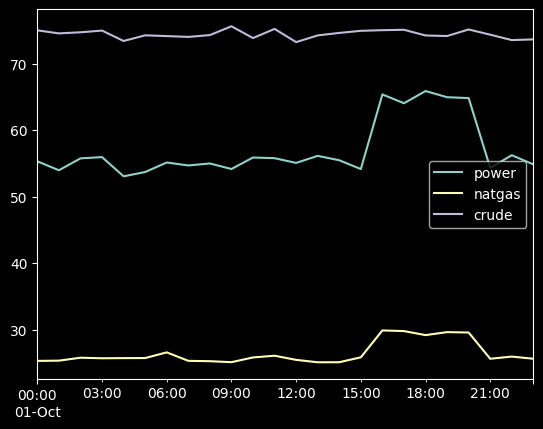

In [67]:
import matplotlib.pyplot as plt

df_prices.plot()
plt.show()

In [68]:
df_prices = pd.DataFrame()
for date in pd.date_range("2024-01-01", "2026-01-01", freq='D'):
    df_prices = pd.concat([df_prices, get_commodity_price_series(date.strftime("%Y-%m-%d"), "GB",granularity="hourly",seed=42)])

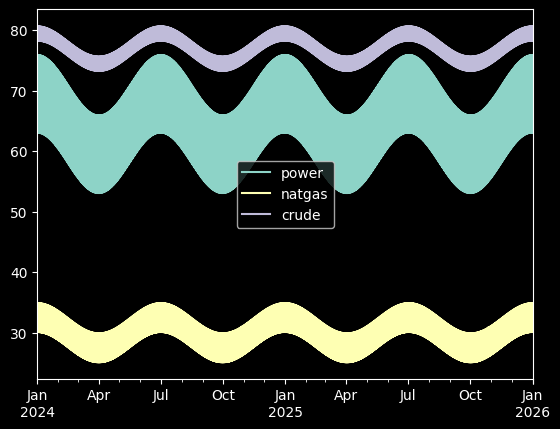

In [69]:
df_prices.plot()
plt.show()

In [70]:
df_prices

,power,natgas,crude
2024-01-01 00:00:00+00:00,65.301758,30.284357,80.007706
2024-01-01 01:00:00+00:00,63.957057,30.322454,79.549205
2024-01-01 02:00:00+00:00,65.747492,30.764675,79.715360
2024-01-01 03:00:00+00:00,65.937606,30.681243,79.971987
2024-01-01 04:00:00+00:00,63.046006,30.704887,78.405654
...,...,...,...
2026-01-01 19:00:00+00:00,74.947115,34.614601,79.151757
2026-01-01 20:00:00+00:00,74.812179,34.556863,80.142002
2026-01-01 21:00:00+00:00,64.316112,30.607865,79.355042
2026-01-01 22:00:00+00:00,66.219582,30.934235,78.541756


In [71]:
for i, row in df_prices.iterrows():
    print(f"{i}: {row.to_dict()}")

2024-01-01 00:00:00+00:00: {'power': 65.30175813778573, 'natgas': 30.284356617934097, 'crude': 80.00770570131957}
2024-01-01 01:00:00+00:00: {'power': 63.957056951790804, 'natgas': 30.322453753771534, 'crude': 79.54920483113231}
2024-01-01 02:00:00+00:00: {'power': 65.74749225383776, 'natgas': 30.764675121792326, 'crude': 79.71536007803314}
2024-01-01 03:00:00+00:00: {'power': 65.93760577442251, 'natgas': 30.68124256119769, 'crude': 79.97198669839456}
2024-01-01 04:00:00+00:00: {'power': 63.04600586937747, 'natgas': 30.704886834813646, 'crude': 78.4056536641239}
2024-01-01 05:00:00+00:00: {'power': 63.694861551168984, 'natgas': 30.713931030519593, 'crude': 79.25876711674768}
2024-01-01 06:00:00+00:00: {'power': 65.12488146119858, 'natgas': 31.56934432945088, 'crude': 79.14574103829605}
2024-01-01 07:00:00+00:00: {'power': 64.68079846568772, 'natgas': 30.295313020823343, 'crude': 79.01936214283315}
2024-01-01 08:00:00+00:00: {'power': 64.98023990052701, 'natgas': 30.24239916447988, 'cru